🎯 Goal:

Understand why customers are leaving (churn) and what patterns predict churn.

You will learn:

How to load & explore a churn dataset

How to visualize retention vs churn

How to identify churn drivers (e.g., monthly charges, tenure)

How to create 3–5 business insights

How to build basic churn visuals in Power BI

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
display(df['MonthlyCharges'].mean())
display(df['tenure'].mean())
display(df.isnull().sum())

np.float64(64.76169246059918)

np.float64(32.37114865824223)

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


📌 1. Monthly Charges vs Churn (Boxplot)

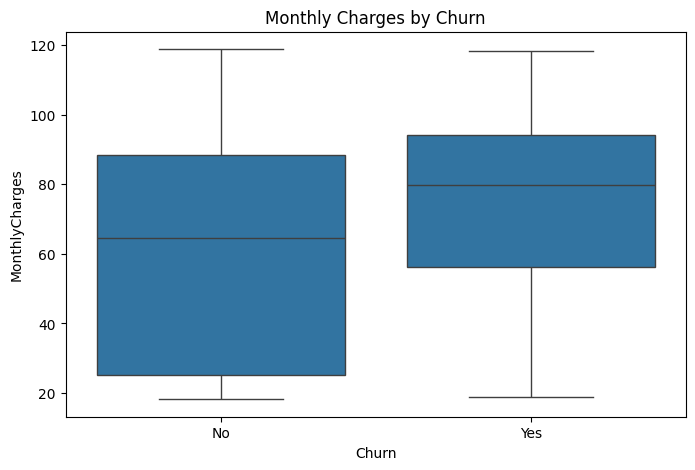

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()


1️⃣ What happened?

The median monthly charge for churned customers is noticeably higher (appox. \$80) than for retained customers (approx. $65)
. This indicates that higher-paying customers are more likely to leave.

2️⃣ Why does it matter?

The current pricing strategy may not match customer expectations.

Higher-tier plans may not provide enough perceived value.

Competitors may be offering similar services at lower prices.

Price-sensitive customers churn faster, reducing long-term revenue.

3️⃣ What should the business do?

Reevaluate the pricing of mid- and high-tier plans.

Compare feature/value differences with competing providers.

Introduce loyalty discounts, bundles, or flexible upgrade paths.

📌 2. Tenure vs Churn (Boxplot)

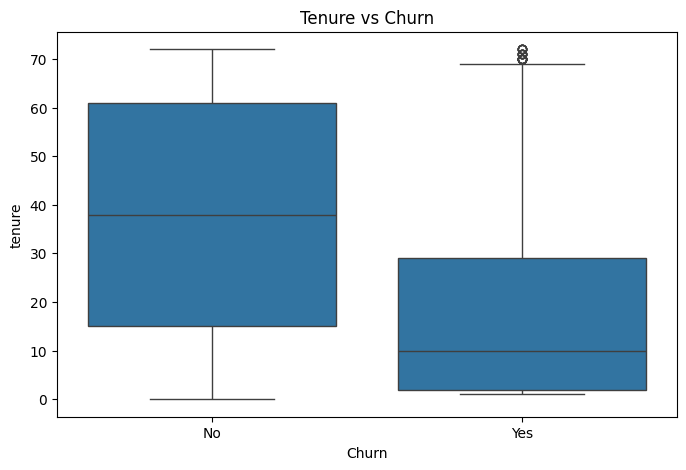

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

1️⃣ What happened?

Churned customers have a very short median tenure (~10 months), whereas retained customers stay significantly longer (median ~38 months). Early-life customers are churning the most.

2️⃣ Why does it matter?

Early churn indicates onboarding or early-experience issues.

Customers leaving early generate little lifetime value.

Poor first-month experience creates long-term revenue leakage.

3️⃣ What should the business do?

Strengthen onboarding, education, and first-week user support.

Offer incentives or discounts during the first few months.

Closely monitor new customers (first 90 days = highest risk).

Churn Rate by Contract Type (Bar Chart)

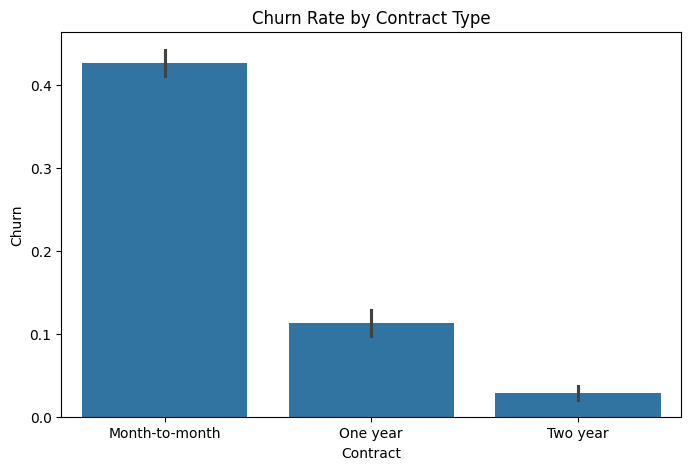

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Contract', y=df['Churn'].apply(lambda x: 1 if x=="Yes" else 0), data=df)
plt.title("Churn Rate by Contract Type")
plt.show()

1️⃣ What happened?

Month-to-month customers have the highest churn rate (approx. 43%), compared to one-year (approx. 11%) and two-year contracts (approx. 3%). Contract length is a major churn predictor.

2️⃣ Why does it matter?

Customers with little commitment can leave more easily.

Longer contracts provide revenue stability and predictability.

Month-to-month customers represent the highest-risk segment.

3️⃣ What should the business do?

Incentivize upgrades from month-to-month to annual plans.

Offer discounts or benefits for switching to longer contracts.

Provide improved onboarding specifically for month-to-month customers.

📌 4. Churn Rate by Internet Service (Bar Chart)

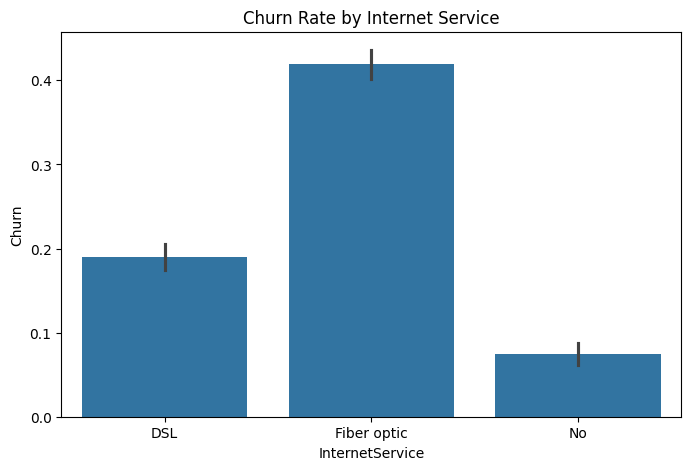

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='InternetService', y=df['Churn'].apply(lambda x: 1 if x=="Yes" else 0), data=df)
plt.title("Churn Rate by Internet Service")
plt.show()

1️⃣ What happened?

Fiber-optic customers show the highest churn (approx. 42%), compared to DSL (approx. 18%) and customers without internet services (approx. 8%). Fiber customers churn disproportionately more.

2️⃣ Why does it matter?

Fiber customers are premium users → losing them hurts revenue more.

High churn suggests issues with service quality or unmet expectations.

DSL customers are more tolerant due to lower performance expectations.

Customers without internet services are less engaged and churn less.

3️⃣ What should the business do?

Investigate fiber-related complaints, outages, and installation delays.

Improve fiber performance and pricing competitiveness.

Introduce targeted retention campaigns for fiber customers.